In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

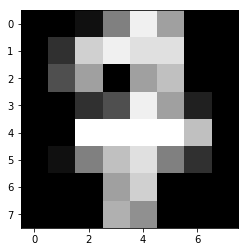

In [8]:
plt.imshow(digits.images[17], cmap='gray')

In [9]:
digits.target[17]

7

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
trainX.shape

(1347, 64)

In [14]:
testX.shape

(450, 64)

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
params = {
    'max_features':[50,60],
    'max_depth':[8,10,12]
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
gs = GridSearchCV(dt, param_grid=params, cv=5, n_jobs=-1)

In [28]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [50, 60], 'max_depth': [8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
gs.best_score_

0.8589458054936897

In [31]:
gs.best_params_

{'max_depth': 12, 'max_features': 60}

In [35]:
best_model = gs.best_estimator_

In [37]:
best_model.score(testX,testY)

0.8066666666666666

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
pipeline = make_pipeline(MinMaxScaler(), SelectKBest(k=50, score_func=f_classif), DecisionTreeClassifier())

In [49]:
grid_params = {
    'selectkbest__k':[20,30,40],
    'decisiontreeclassifier__max_depth':[8,10,12]
}

In [50]:
gs = GridSearchCV(pipeline, grid_params, cv=5, n_jobs=-1)

In [51]:
gs.fit(trainX,trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selectkbest', SelectKBest(k=50, score_func=<function f_classif at 0x7fb0de0bed08>)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_lea...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'selectkbest__k': [20, 30, 40], 'decisiontreeclassifier__max_depth': [8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
gs.best_params_

{'decisiontreeclassifier__max_depth': 10, 'selectkbest__k': 30}

In [53]:
gs.best_score_

0.8604305864884929